<a href="https://colab.research.google.com/github/priyoislam/Object_Detection_with_numpy/blob/main/objectdetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt

  Preparing metadata (setup.py) ... done
  Created wheel for colormath: filename=colormath-3.0.0-py3-none-any.whl size=39406 sha256=b30603a97f8ee67f778c69f227898fcde055417870bab9a9758f5053933f82b7
  Stored in directory: /root/.cache/pip/wheels/ab/b3/4d/c0738759c25a1df01958068f162cf2a9dc3ab1da8b972cfcfc
Successfully built colormath


Average color (RGB values): [254  98 124]


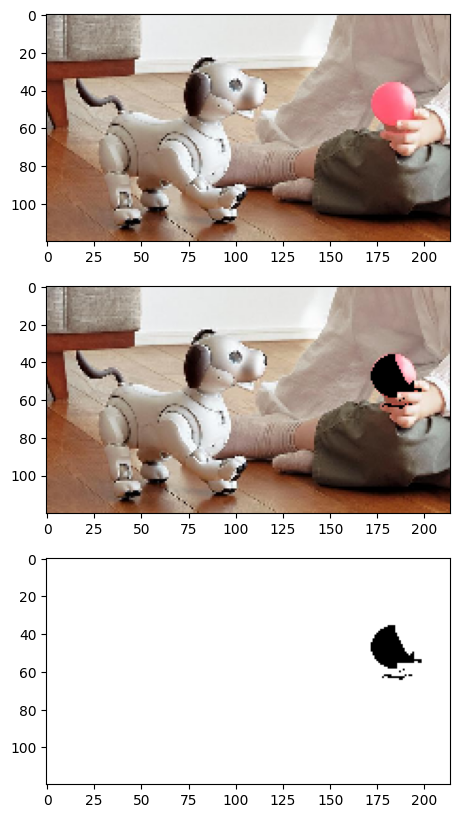

Object is in the center-right of the image 


In [7]:
image_path = "/content/drive/MyDrive/Colab Notebooks/image3.jpg"

im = plt.imread(image_path)
#image= plt.imread(image_path)
image = im[::3,::3]
n_copy=np.copy(image)


image_size = image.shape[:2]


# channel_means = np.mean(image, axis=(0, 1))
# channel_stds = np.std(image, axis=(0, 1))
average_color_float= np.mean(n_copy[45:50,180:185], axis=(0, 1))
average_color = np.round(average_color_float).astype(int)
print("Average color (RGB values):", average_color)

target_color=average_color
#print(target_color)
threshold = 60
# # Apply per-channel normalization to reduce lighting variations
# corrected_image = (image - channel_means) / channel_stds


modified_image = np.empty_like(image)

# Calculate color distances and replace with new color
for i in range(image.shape[0]):
    for j in range(image.shape[1]):
        pixel = image[i, j]
        distance = np.linalg.norm(pixel - average_color)

        # Replace the pixel with the new color based on distance threshold
        if distance < threshold:  # You can define a threshold to determine when to replace
            modified_image[i, j] = np.array([0,0,0])
        else:
            modified_image[i, j] = pixel


color_distances = np.linalg.norm(image - target_color, axis=-1)

# Create a binary mask based on color distance threshold
blob_mask = color_distances < threshold



center_y, center_x = np.array(blob_mask.shape) // 2

# Find the y and x coordinates of the blob's center of mass
coordinates = np.argwhere(blob_mask)
blob_center_y, blob_center_x = np.mean(coordinates, axis=0)

# Determine the position of the blob based on its center's position

position = ""



if abs(blob_center_y - center_y) < 30:
    position += "center"
elif blob_center_y < center_y:
    position += "top"
elif blob_center_y > center_y:
    position += "bottom"


if abs(blob_center_x - center_x) < 30:
    position += "-center"
elif blob_center_x < center_x:
    position += "-left"
elif blob_center_x > center_x:
    position += "-right"

if position=="center-center":position="center"


fig, axes = plt.subplots(3, 1,figsize=[15, 10])
axes[0].imshow(image)
axes[1].imshow(modified_image)
axes[2].imshow(blob_mask, cmap='gist_yarg')
plt.show()
# Display the position of the blob
print("Object is in the "+position+" of the image ")